In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
text_dataset=pd.read_csv('/content/drive/MyDrive/SIT-AstonHackathon/FinalDisasterTweets.csv')

In [50]:
text_dataset.head()

,num,text,timestamp,label
0,0.0,RT @uberdogfound: Please RT - Food needed for ...,40657.975,1
1,1.0,Please RT - Food needed for shelter in NC in a...,40657.975,1
2,3.0,‚ô°its raining and tornado warnings....about t...,40657.89792,1
3,9.0,Lmao #damn RT @LuCeCaNNoNn: If I don't get any...,40657.76667,1
4,10.0,Saved by the tornado warning....I'm just ready...,40657.75625,0


In [51]:
text_dataset.shape

(41998, 4)

In [52]:
text_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41998 entries, 0 to 41997
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   num        41998 non-null  float64
 1   text       41998 non-null  object 
 2   timestamp  41998 non-null  object 
 3   label      41998 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ MB


In [53]:
text_dataset.describe()

,num,label
count,4.199800e+04,41998.000000
mean,4.467568e+16,0.751107
std,1.999595e+17,0.432377
min,0.000000e+00,0.000000
25%,1.468000e+03,1.000000
50%,3.563000e+03,1.000000
75%,7.950664e+07,1.000000
max,1.170000e+18,1.000000


In [54]:
text_dataset['label'].value_counts()

1    31545
0    10453
Name: label, dtype: int64

In [55]:
temp = text_dataset.groupby('label').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,label,text
1,1,31545
0,0,10453


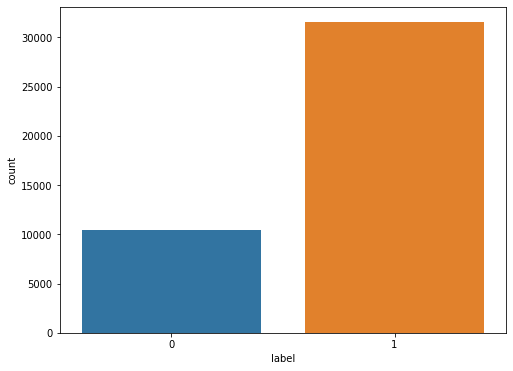

In [56]:
plt.figure(figsize=(8,6))
sns.countplot(text_dataset['label'])

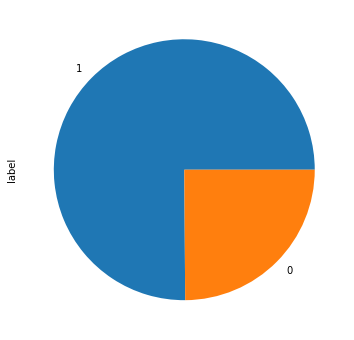

In [57]:
plt.figure(figsize=(8,6))
text_dataset.label.value_counts().plot(kind='pie')

In [58]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [59]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [60]:
text_dataset['text'] = text_dataset['text'].apply(lambda x:clean_text(x))


In [61]:
text_dataset.head()

,num,text,timestamp,label
0,0.0,rt uberdogfound please rt food needed for she...,40657.975,1
1,1.0,please rt food needed for shelter in nc in ar...,40657.975,1
2,3.0,‚ô°its raining and tornado warningsabout to be...,40657.89792,1
3,9.0,lmao damn rt lucecannonn if i dont get any foo...,40657.76667,1
4,10.0,saved by the tornado warningim just ready to e...,40657.75625,0


In [62]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [63]:
text_dataset['temp_list1'] = text_dataset['text'].apply(lambda x:str(x).split()) #List of words in every row for text
text_dataset['temp_list1'] = text_dataset['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [64]:
top = Counter([item for sublist in text_dataset['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,food,13256
2,car,9470
3,shelter,9158
4,â€¦,8039
5,dorian,6971
6,matthew,5227
7,ride,4754
8,cars,3868
9,tornado,3577
10,blizzard,3415


In [65]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree Of Most Common Words')
fig.show()

In [66]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [67]:
fig = px.line(temp, x="Common_words", y="count", title='Commmon Words in Text',
             width=500, height=500)
fig.show()

In [68]:
fig = px.pie(temp, values="count", names="Common_words", title='Commmon Words in Text',
             width=700, height=700,color='Common_words')
fig.show()

In [69]:
Positive_sent = text_dataset[text_dataset['label']==0]
Negative_sent = text_dataset[text_dataset['label']==1]

In [70]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list1'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,hurricane,7755
1,food,2973
2,shelter,2776
3,car,1804
4,ride,1761
5,matthew,1628
6,â€¦,1575
7,dorian,1441
8,tornado,1054
9,safe,1030


In [71]:
fig = px.treemap(temp_positive, path=['Common_words'], values='count',title='Tree Of Most Common Positive Words')
fig.show()

In [72]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [73]:
fig = px.line(temp_positive, x="Common_words", y="count", title='Commmon Positive Words in Text',
             width=500, height=500)
fig.show()

In [74]:
fig = px.pie(temp_positive, values="count", names="Common_words", title='Commmon Positive Words in Text',
             width=700, height=700,color='Common_words')
fig.show()

In [75]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list1'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,food,10283
2,car,7666
3,â€¦,6464
4,shelter,6382
5,dorian,5530
6,matthew,3599
7,cars,3338
8,blizzard,3124
9,ride,2993
10,tornado,2523


In [76]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [77]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=900, height=700,color='Common_words')
fig.show()

In [78]:
fig = px.line(temp_negative, x="Common_words", y="count", title='Commmon Negative Words in Text',
             width=500, height=500)
fig.show()

In [79]:
fig = px.pie(temp_negative, values="count", names="Common_words", title='Commmon Negative Words in Text',
             width=700, height=700,color='Common_words')
fig.show()

In [80]:
raw_text = [word for word_list in text_dataset['temp_list1'] for word in word_list]

In [81]:
def words_unique(label,numwords,raw_words):
    
    allother = []
    for item in text_dataset[text_dataset.label != label]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in text_dataset[text_dataset.label == label]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [82]:
Unique_Positive= words_unique(0, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,cayes,116
1,ameborworldcom,96
2,postfrankenstorm,37
3,muntinlupa,31
4,surfs,26
5,â€œhopefully,24
6,hereâ€video,24
7,pragmatic,23
8,tremendously,16
9,visitthebahamas,16


In [83]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

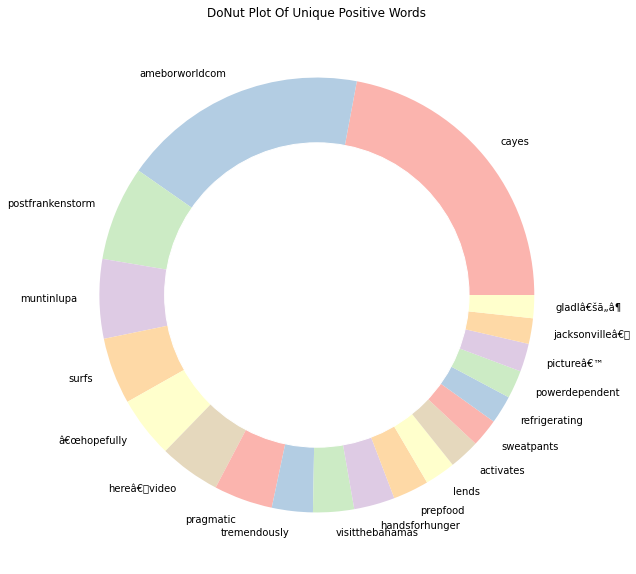

In [84]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(13,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [85]:
Unique_Negative= words_unique(1, 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,handful,135
1,skis,134
2,bulldozer,132
3,britains,110
4,stalled,92
5,butts,83
6,degrees,77
7,falsely,70
8,descend,66
9,autoblog,66


In [86]:
fig = px.treemap(Unique_Negative, path=['words'], values='count',title='Tree Of Unique Negative Words')
fig.show()

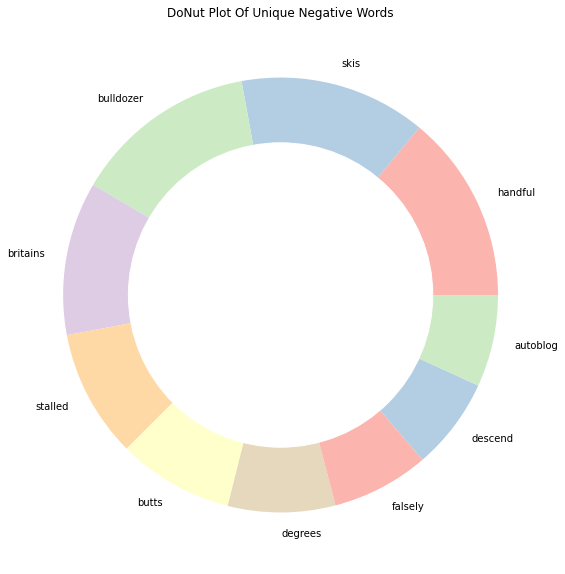

In [87]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [88]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(15,10), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  


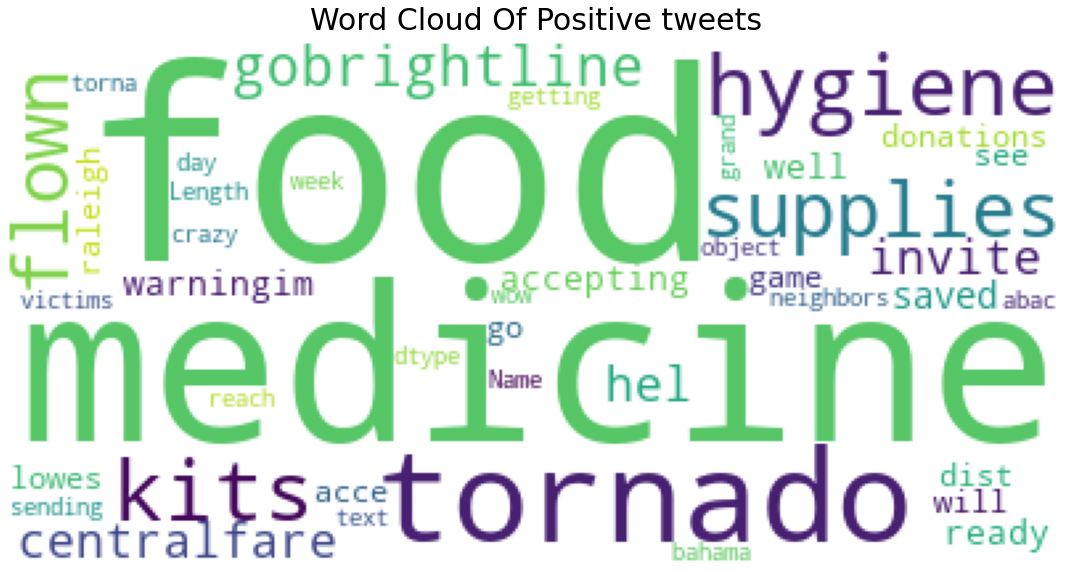

In [89]:
plot_wordcloud(Positive_sent.text,title="Word Cloud Of Positive tweets",title_size=30)

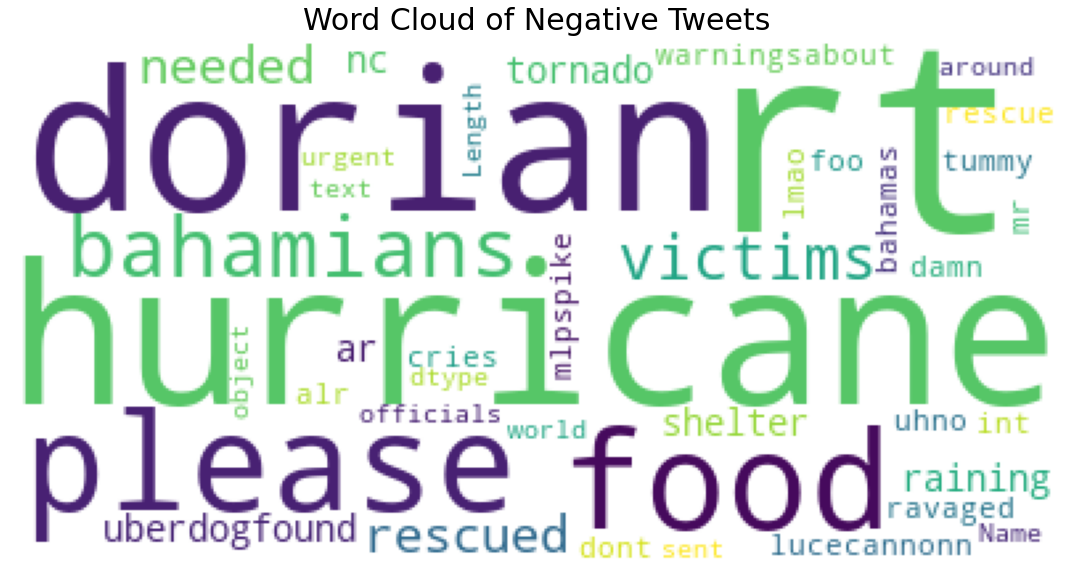

In [90]:
plot_wordcloud(Negative_sent.text,title="Word Cloud of Negative Tweets",color='white',title_size=30)